In [1]:
install.packages("readxl", repos='http://cran.us.r-project.org') 
library(readxl)

nhl_data <-read_excel("Rgraphics/lab3Data/NHLTop100.xlsx")

Installing package into 'C:/Users/Akash Yeleswarapu/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'readxl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readxl'"


The downloaded binary packages are in
	C:\Users\Akash Yeleswarapu\AppData\Local\Temp\RtmpUbcxrl\downloaded_packages


In [2]:
head(nhl_data)

Rank,Player,Team,Pos,1st NHL Season,Last NHL Season,GP,G,A,P,+/-,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,NA,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,NA,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,NA,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,NA,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,NA,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,NA,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


In [3]:
# initial fitting
pred_line <- lm(A ~ G, data = nhl_data)

In [4]:
#  a. evaluating the fitting by noting R2 and p values in the fit

library(ggplot2)
p1 <- ggplot(nhl_data, aes(x = G, y = A))

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [5]:
summary(pred_line)


Call:
lm(formula = A ~ G, data = nhl_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


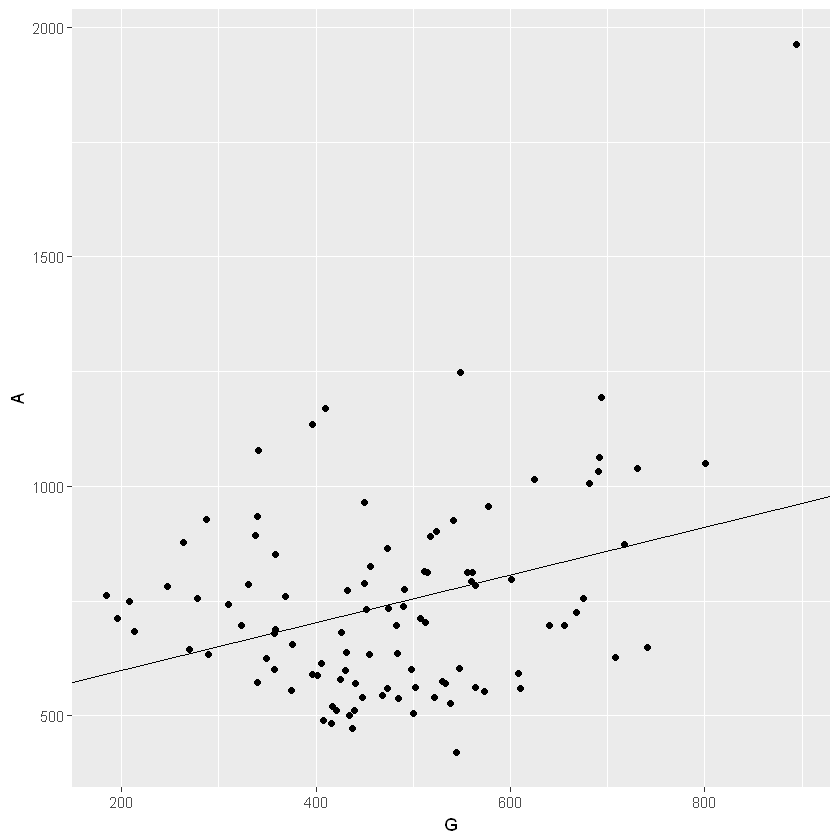

In [6]:
p1 + geom_point() + geom_abline(intercept = 494.5135, slope = 0.5202)

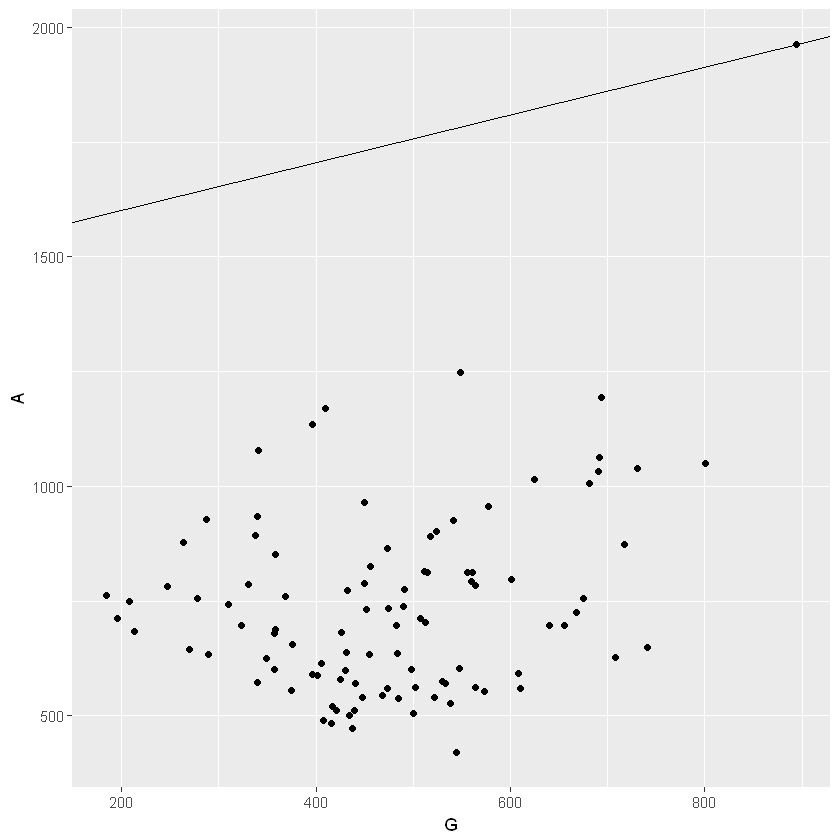

In [7]:
#  forcing the line through Wayne Gretzky

pred_line2 <- lm(I(A-1963)~I(G-894),data=nhl_data)

p2 <- ggplot(nhl_data, aes(x = G, y = A))

c = (1963 - (coef(pred_line2)[2] * 894))

p2 + geom_point() + geom_abline(intercept = c, slope = coef(pred_line2)[2])


In [8]:
nhl_data[101,]$G <- 285
nhl_data[101,]$A <- 465
nhl_data[101,]$Player <- "Patrick Kane"

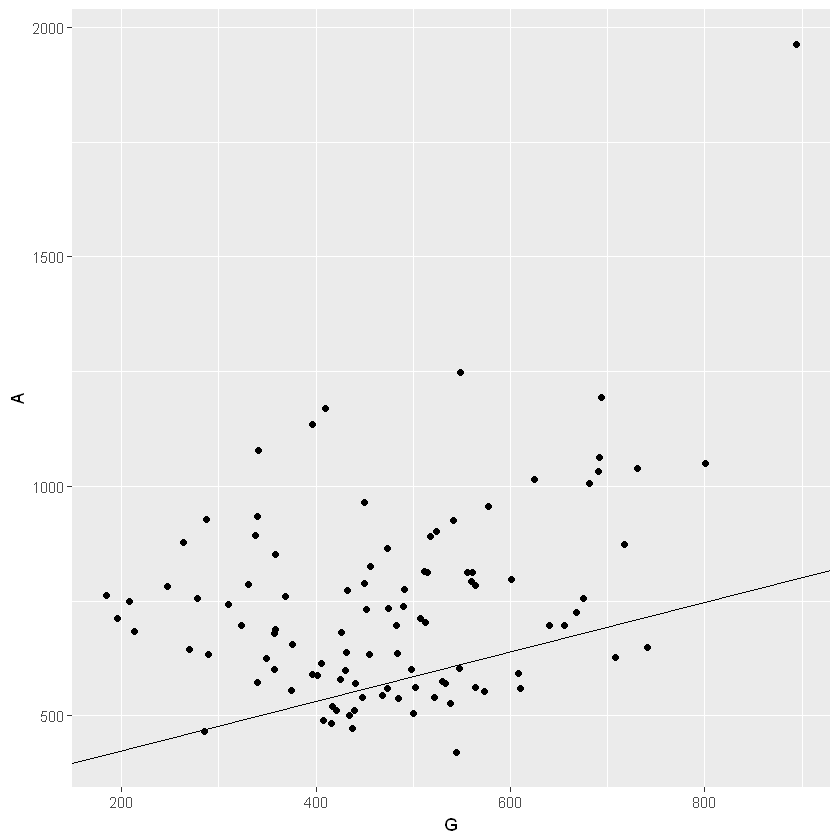

In [9]:
#  forcing the line through Patrick Kane

pred_line3 <- lm(I(A-465)~I(G-285),data=nhl_data)

p3 <- ggplot(nhl_data, aes(x = G, y = A))

c = (465 - (coef(pred_line2)[2] * 285))

p3 + geom_point() + geom_abline(intercept = c, slope = coef(pred_line3)[2])


In [10]:
#  forcing the initial line through origin

pred_line4 <- lm(A ~ G + 0, data = nhl_data)
p4 <- ggplot(nhl_data, aes(x = G, y = A))



In [11]:
summary(pred_line4)


Call:
lm(formula = A ~ G + 0, data = nhl_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-447.30 -137.15    3.59  157.86  639.13 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48083    0.04977   29.76   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 246.7 on 100 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8975 
F-statistic: 885.4 on 1 and 100 DF,  p-value: < 2.2e-16


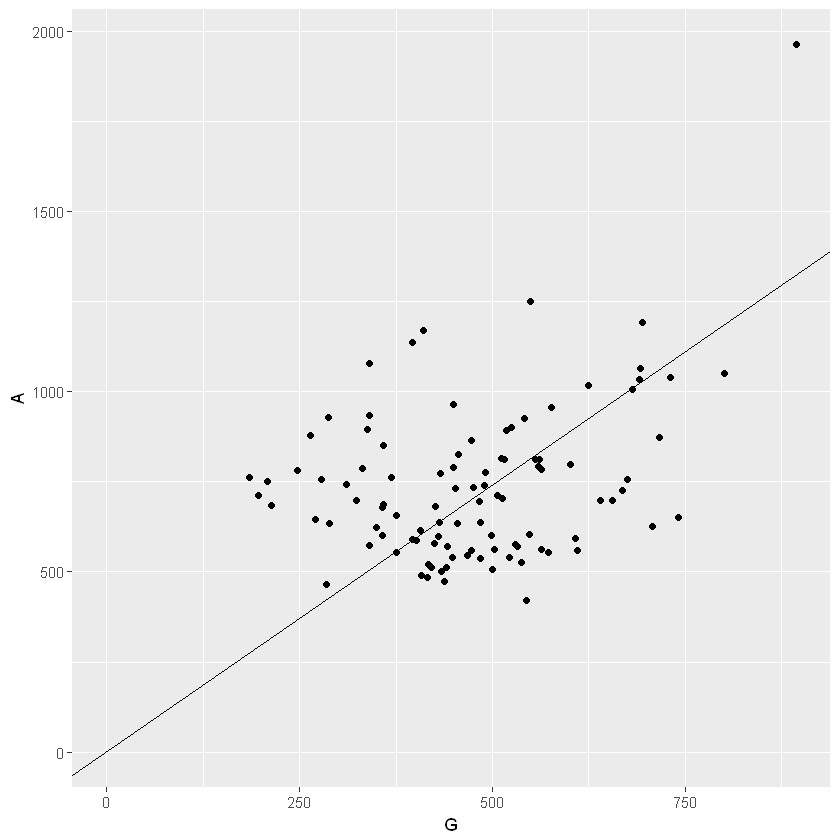

In [12]:
p4 + geom_point() + geom_abline(intercept = 0, slope = 1.48083) + expand_limits(x= 0, y=0)

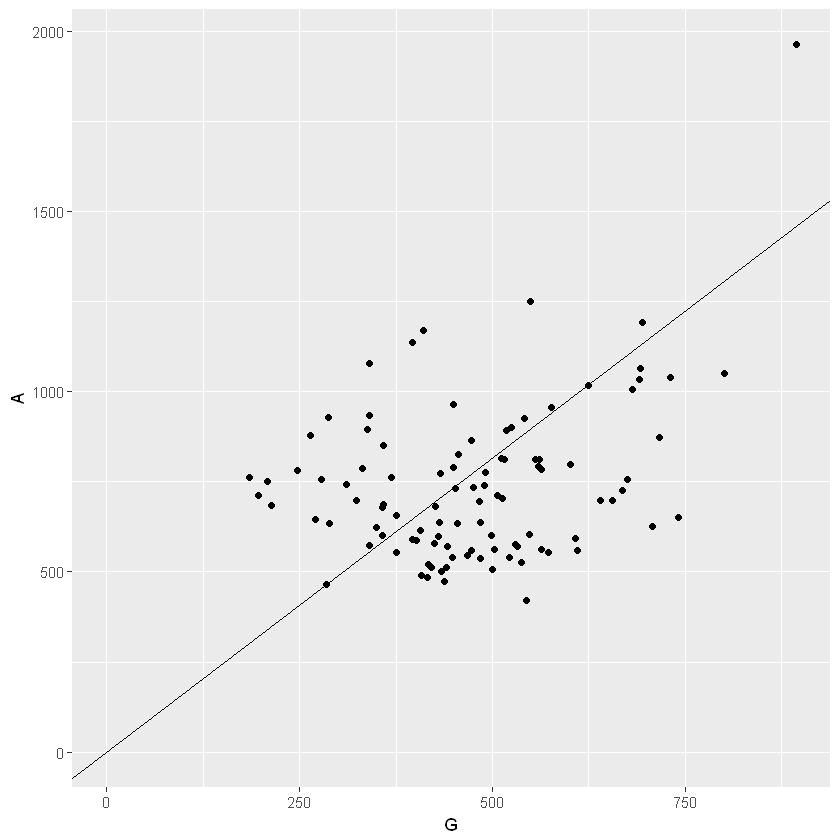

In [13]:
#  forcing the line through origin and Patrick Kane

pred_line5 <- lm(I(A-465)~I(G-285) + 0,data=nhl_data)

p5 <- ggplot(nhl_data, aes(x = G, y = A))

c = 0

slope_line = 465/285

p5 + geom_point() + geom_abline(intercept = c, slope = slope_line) + expand_limits(x= 0, y=0)


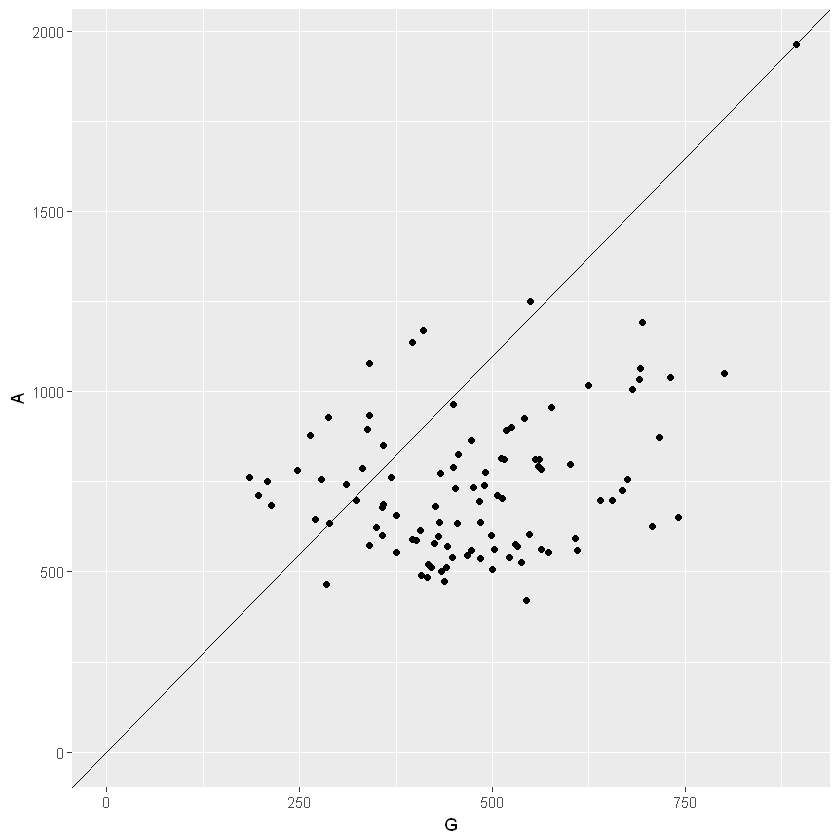

In [14]:
#  forcing the line through origin and Wayne Gretzky

pred_line6 <- lm(I(A-1963)~I(G-894),data=nhl_data)

p6 <- ggplot(nhl_data, aes(x = G, y = A))

c = 0

slope_line = 1963/894


p6 + geom_point() + geom_abline(intercept = c, slope = slope_line) + expand_limits(x=0,y=0)


In [15]:
summary(pred_line)


Call:
lm(formula = A ~ G, data = nhl_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


In [16]:
summary(pred_line2)


Call:
lm(formula = I(A - 1963) ~ I(G - 894), data = nhl_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1003.4220    66.4463 -15.101  < 2e-16 ***
I(G - 894)      0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


In [17]:
summary(pred_line3)


Call:
lm(formula = I(A - 465) ~ I(G - 285), data = nhl_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.98 -172.72   -8.94  126.20  997.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 172.7210    34.8505   4.956 2.97e-06 ***
I(G - 285)    0.5377     0.1492   3.603 0.000493 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.7 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.107 
F-statistic: 12.98 on 1 and 99 DF,  p-value: 0.0004934


In [18]:
summary(pred_line4)


Call:
lm(formula = A ~ G + 0, data = nhl_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-447.30 -137.15    3.59  157.86  639.13 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48083    0.04977   29.76   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 246.7 on 100 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8975 
F-statistic: 885.4 on 1 and 100 DF,  p-value: < 2.2e-16


In [19]:
summary(pred_line5)


Call:
lm(formula = I(A - 465) ~ I(G - 285) + 0, data = nhl_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.85 -114.55   40.53  165.99  807.05 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 285)   1.1346     0.0979   11.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 229.8 on 100 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5689 
F-statistic: 134.3 on 1 and 100 DF,  p-value: < 2.2e-16


In [20]:
summary(pred_line6)


Call:
lm(formula = I(A - 1963) ~ I(G - 894), data = nhl_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.98 -172.72   -8.94  126.20  997.84 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -997.8422    66.0236 -15.113  < 2e-16 ***
I(G - 894)     0.5377     0.1492   3.603 0.000493 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.7 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.107 
F-statistic: 12.98 on 1 and 99 DF,  p-value: 0.0004934


In [21]:
final_result <- data.frame(reference = character(), rSquare = numeric(), p = numeric())
final_result <- rbind(final_result, data.frame(reference = "initial fitting", rSquare = 0.1082
                                  , p = 0.0008317 ))
final_result <- rbind(final_result, data.frame(reference = "wayne gretzky", rSquare = 0.1082
                                  , p = 0.0008317 ))
final_result <- rbind(final_result, data.frame(reference = "patrick kane", rSquare = 0.116
                                  , p = 0.0004934 ))
final_result <- rbind(final_result, data.frame(reference = "initial fitting on origin", rSquare = 0.8985
                                  , p = 2.2e-16 ))
final_result <- rbind(final_result, data.frame(reference = "patrick kane on origin", rSquare = 0.5732
                                  , p = 2.2e-16 ))
final_result <- rbind(final_result, data.frame(reference = "wayne gretzky on origin", rSquare =  0.116
                                  , p = 0.0004934 ))

In [22]:
final_result

reference,rSquare,p
initial fitting,0.1082,8.317e-04
wayne gretzky,0.1082,8.317e-04
patrick kane,0.1160,4.934e-04
initial fitting on origin,0.8985,2.200e-16
patrick kane on origin,0.5732,2.200e-16
wayne gretzky on origin,0.1160,4.934e-04


## Interpretation

### Based on the above values, we can say that the rsquare value increases when we add origin to the initial fitting and other given points. Also the p value decreases for these models. With these observations, we can surely say that the latter three models are better models compared to the initial ones. 